<a href="https://colab.research.google.com/github/jassi0216/CodSoft_Task2/blob/main/MovieRating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# for interactive visualizations
import plotly.express as px
import plotly.figure_factory as ff
import plotly.offline as py

In [134]:
df=pd.read_csv("IMDbMovies.csv",encoding='latin-1')
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


Data Processing

In [135]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

In [136]:
dataoveriew(df, 'Overiew of the training dataset')

Overiew of the training dataset:

Rows: 15509

Number of features: 10

Features:
['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

Missing values: 33523

Unique values:
Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64


In [137]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [138]:
#genre, director, and actors values counts
df['Genre'].value_counts()

Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: Genre, Length: 485, dtype: int64

In [139]:
df['Director'].value_counts()

Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
                    ..
Naeem Siddiqui       1
Shadaab Khan         1
Mystelle Brabbee     1
Kunal Shivdasani     1
Kiran Thej           1
Name: Director, Length: 5938, dtype: int64

In [140]:
df['Actor 1'].value_counts()

Ashok Kumar           158
Dharmendra            140
Jeetendra             140
Mithun Chakraborty    133
Amitabh Bachchan      129
                     ... 
Vatsal Sheth            1
Ujala Baboria           1
Dimple Sewak            1
Komal Leels             1
Sangeeta Tiwari         1
Name: Actor 1, Length: 4718, dtype: int64

In [141]:
director = df.dropna(axis=0, subset=['Director'])

In [142]:
dfg = director['Director'].value_counts().head(20)

In [143]:
fig = px.bar(dfg)
fig.show()

<ipython-input-188-88af457ccfbe>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-188-88af457ccfbe>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




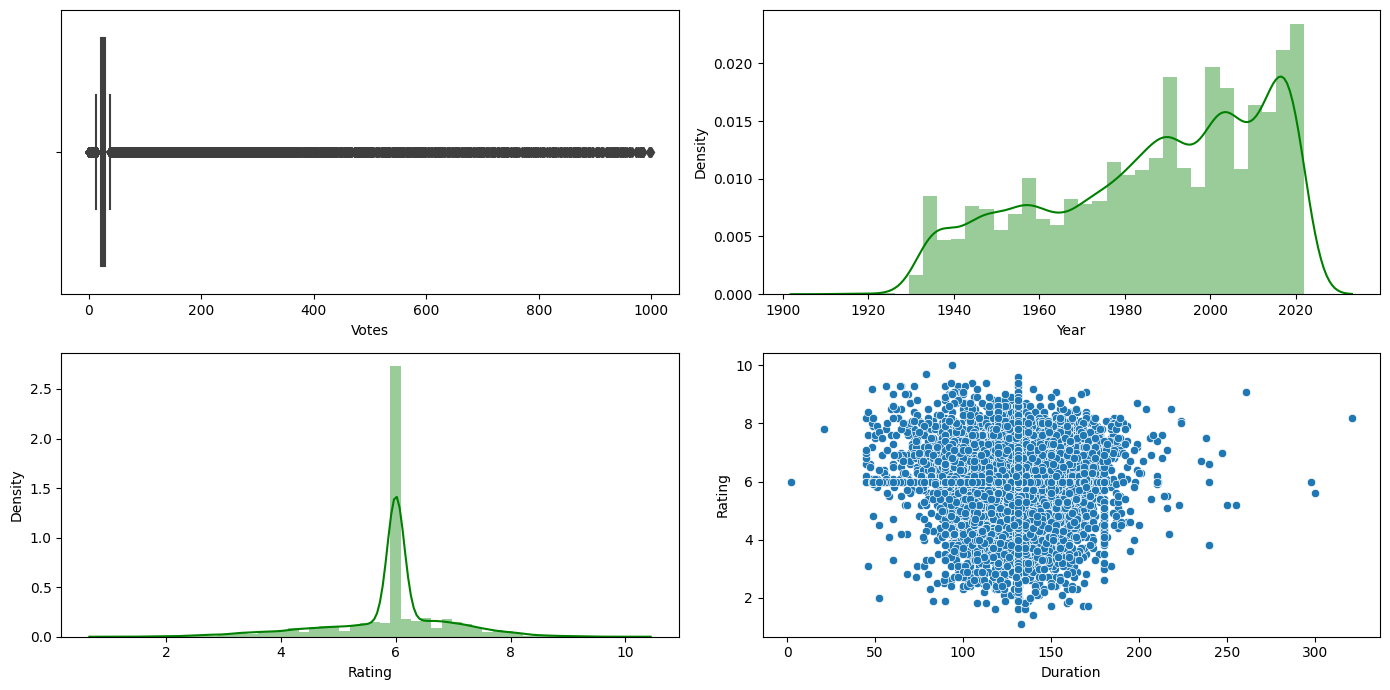

In [188]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(x='Votes',data=df)

plt.subplot(2,2,2)
sns.distplot(df['Year'],color='g')

plt.subplot(2,2,3)
sns.distplot(df['Rating'],color='g')

plt.subplot(2,2,4)
sns.scatterplot(x=df['Duration'], y=df['Rating'], data=df)

plt.tight_layout()
plt.show()

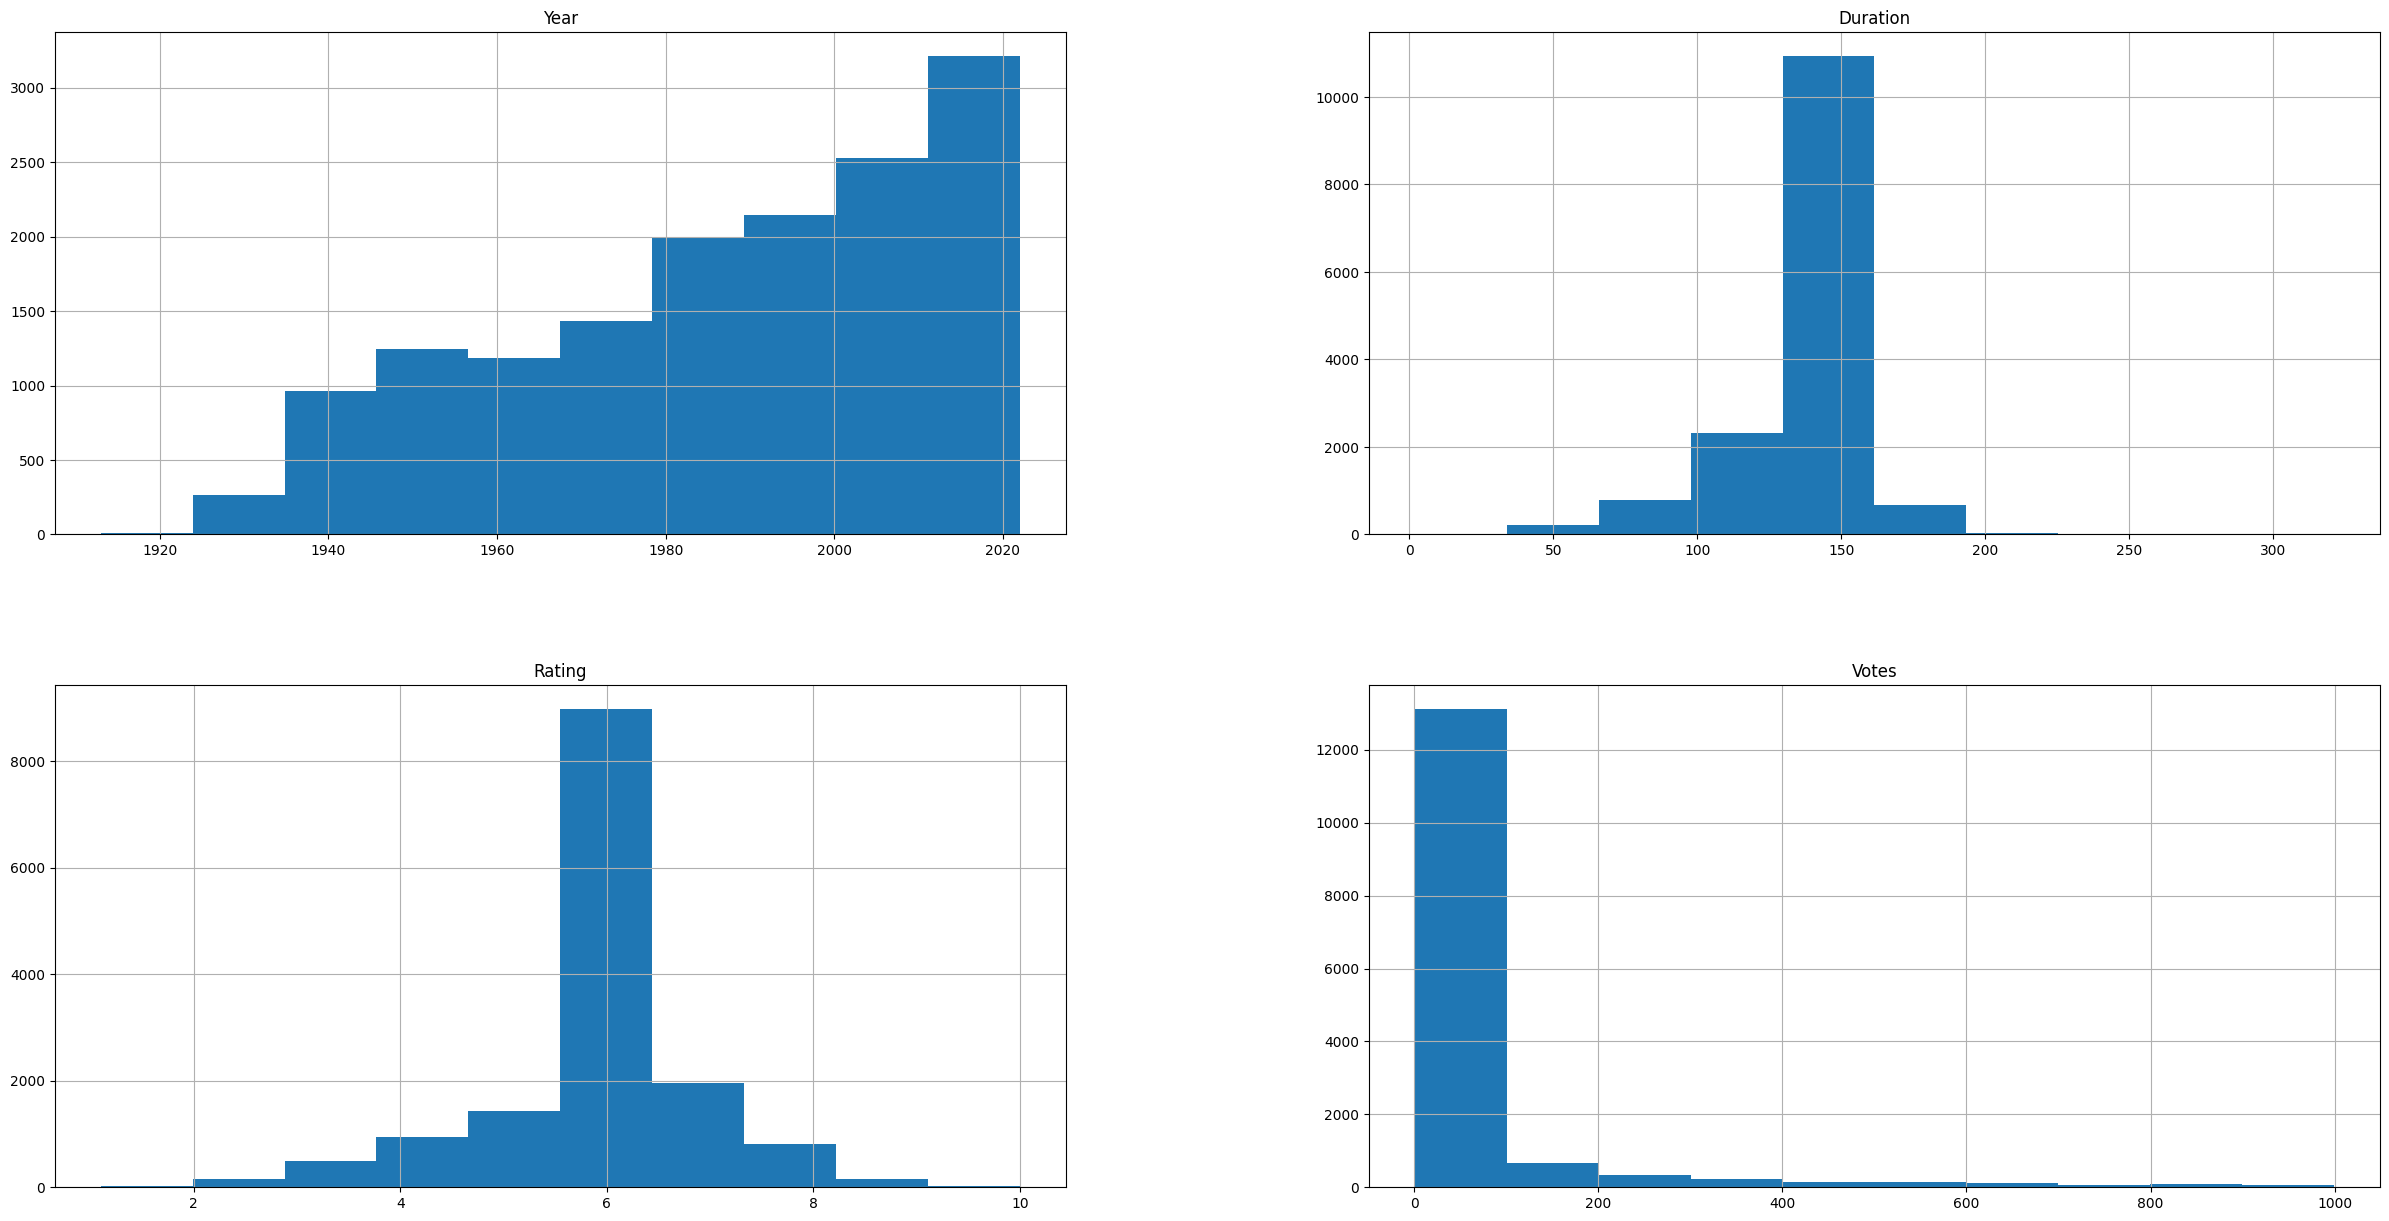

In [189]:
df.hist(figsize=(30, 15))
None

In [144]:
df['Year'] = df['Year'].str.extract('(\d+)')  # Extract numeric part of the string
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert to numeric

In [145]:
df['Duration'] = df['Duration'].str.extract('(\d+)')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

In [146]:
df['Votes'] = df['Votes'].str.extract('(\d+)')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

In [147]:
genre = df['Genre']
genre.head(5)

0              Drama
1              Drama
2     Drama, Musical
3    Comedy, Romance
4              Drama
Name: Genre, dtype: object

In [148]:
genres = df['Genre'].str.split(', ', expand=True)
genres.head(5)

,0,1,2
0,Drama,None,None
1,Drama,None,None
2,Drama,Musical,None
3,Comedy,Romance,None
4,Drama,None,None


In [149]:
directors = df["Director"].value_counts()
directors.head(5)

Jayant Desai       58
Kanti Shah         57
Babubhai Mistry    50
Mahesh Bhatt       48
Master Bhagwan     47
Name: Director, dtype: int64

In [150]:
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']]).dropna().value_counts()
actors.head(5)

Mithun Chakraborty    241
Dharmendra            231
Ashok Kumar           227
Jeetendra             179
Amitabh Bachchan      178
dtype: int64

In [178]:
#filling the missing values of the duration by median age
df['Duration']=df['Duration'].fillna(df['Duration'].median())

#filling the missing values of the Rating  by median age
df['Rating']=df['Rating'].fillna(df['Rating'].median())

#filling the missing values of the Vote by median age
df['Votes']=df['Votes'].fillna(df['Votes'].median())

#deleting rows having null values in Year column
df=df.dropna(subset="Year")

In [177]:
df.isnull().sum()

Name           0
Year           0
Duration       0
Genre       1841
Rating         0
Votes          0
Director     497
Actor 1     1488
Actor 2     2197
Actor 3     2907
dtype: int64

In [151]:
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as mpl


In [120]:
from sklearn.model_selection import train_test_split

In [179]:
X = df[['Year','Duration','Votes']]
y = df['Rating']

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1000)

In [181]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDRegressor(max_iter=10000, random_state=1000))
])


In [183]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd', SGDRegressor(max_iter=10000, random_state=1000))])

In [184]:
# Predict ratings on the test set
y_pred_pipeline = pipeline.predict(X_test)

Model Evaluation

In [185]:
# Evaluation Metrics for the Pipeline
mae_pipeline = mean_absolute_error(y_test, y_pred_pipeline)
mse_pipeline = mean_squared_error(y_test, y_pred_pipeline)
r2_pipeline = r2_score(y_test, y_pred_pipeline)

In [186]:
print("Pipeline Mean Absolute Error:", mae_pipeline)
print("Pipeline Mean Squared Error:", mse_pipeline)
print("Pipeline R-squared:", r2_pipeline)

Pipeline Mean Absolute Error: 0.6336548316779554
Pipeline Mean Squared Error: 0.9960519589768192
Pipeline R-squared: 0.011664379471771236


Model deployment

In [187]:
# Take new user input for prediction
new_input = pd.DataFrame({
    'Year': [2023],          # Replace with the desired year
    'Duration': [120],       # Replace with the desired duration in minutes
    'Votes': [10000],        # Replace with the desired number of votes
})

# Use the trained pipeline to make predictions on the input
predicted_rating = pipeline.predict(new_input)

print("Predicted Rating:", predicted_rating)

Predicted Rating: [3.22903916]
